In [1]:
import pandas as pd

url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"

dados = pd.read_csv(url, sep='\t')

dados.head()


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [2]:
a_renomear = {
   'AGE': 'IDADE',
    'SEX': 'SEXO',
    'BMI':'IMC',
    'BP': 'PRESSAO SANGUINEA',
    'S1': 'COLESTEROL',
    'S2': 'LDL',
    'S3': 'HDL',
    'S4': 'TCH',
    'S5': 'LTG',
    'S6': 'GLICOSE'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,IDADE,SEXO,IMC,PRESSAO SANGUINEA,COLESTEROL,LDL,HDL,TCH,LTG,GLICOSE,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
import numpy as np

condicao = (dados['COLESTEROL'] > 190) & (dados['GLICOSE']>100)
dados['RISCO'] = np.where(condicao, 1, 0)

dados.head()

,IDADE,SEXO,IMC,PRESSAO SANGUINEA,COLESTEROL,LDL,HDL,TCH,LTG,GLICOSE,Y,RISCO
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,0
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,0
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,0
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206,0
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135,0


In [4]:
risco_1 = sum(dados['RISCO'] == 1)

print(f"{risco_1} pessoas têm RISCO igual a 1.")


57 pessoas têm RISCO igual a 1.


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
x= dados[["IDADE","IMC","COLESTEROL","GLICOSE"]]
y=dados["RISCO"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 331 elementos e testaremos com 111 elementos
A acurácia foi 87.39%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [6]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)


A acurácia do dummy foi 74.77%


In [7]:
dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)


A acurácia do dummy mostfrequent foi 87.39%


In [8]:
from sklearn.preprocessing import StandardScaler#padroniza os dados
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)
#transforma os dados para que tenham uma média de 0 e um desvio padrão de 1

Treinaremos com 331 elementos e testaremos com 111 elementos
A acurácia foi 96.40%


In [9]:
#arvore de decisao
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=5)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 331 elementos e testaremos com 111 elementos
A acurácia foi 99.10%


In [10]:
!pip install graphviz==0.10
!apt-get install graphviz


  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


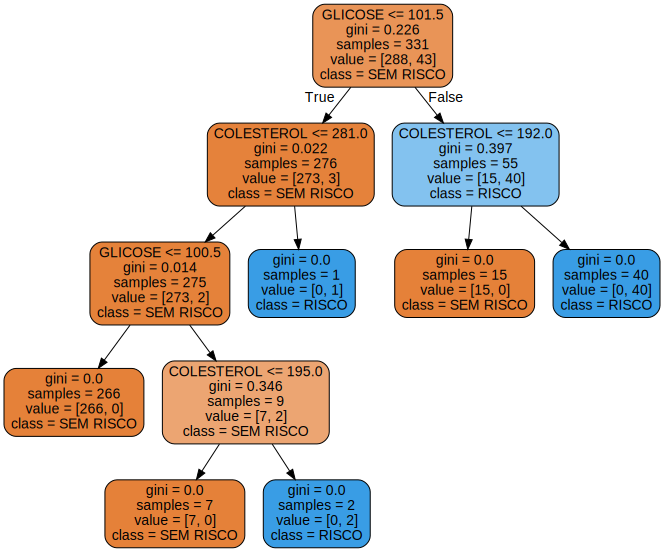

In [11]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["SEM RISCO", "RISCO"])
grafico = graphviz.Source(dot_data)
grafico
